In [1]:
"""
### 함수형 API (Functional API)

함수 형태로 딥러닝 모델을 정의하면 다양한 모델 구조를 구현할 수 있다
여러 층을 시퀀스 형태로 연결하는 Sequential API와 다르게, 
Functional API는 복잡한 구조의 모델을 정의할수 있다
"""

'\n### 함수형 API (Functional API)\n\n함수 형태로 딥러닝 모델을 정의하면 다양한 모델 구조를 구현할 수 있다\n여러 층을 시퀀스 형태로 연결하는 Sequential API와 다르게, \nFunctional API는 복잡한 구조의 모델을 정의할수 있다\n'

In [2]:
import tensorflow as tf

#ㅔ라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

#load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()


In [3]:
"""
이건 Sequential API로 구현된 모델
Sequential API를 사용하는 경우 단반향의 Sequential 모델만 구현할 수 있다는 제약
"""
#책에 중략으로 코드가 빠진것을 확인 - 모델 아무거나 불러옴
# 모델정의 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    # 노드=10개가 되어야 한다
    tf.keras.layers.Dense(10, activation="softmax"),
])

#모델 컴파일
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

In [4]:
# 체크포인트 설정
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = "tmp_checkpoint.ckpt",
                                               save_weights_only = True,
                                               save_best_only = True,
                                               monitor = "val_loss",
                                               verbose=1)

In [5]:
model.fit(x_train, y_train,
         validation_data=(x_test,y_test),
         epochs=10,
         callbacks=[checkpoint]
         )

Epoch 1/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.2238 - accuracy: 0.9323
Epoch 00001: val_loss improved from inf to 0.11366, saving model to tmp_checkpoint.ckpt
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2238 - accuracy: 0.9323 - val_loss: 0.1137 - val_accuracy: 0.9632
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0926 - accuracy: 0.9713
Epoch 00002: val_loss improved from 0.11366 to 0.09100, saving model to tmp_checkpoint.ckpt
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0927 - accuracy: 0.9713 - val_loss: 0.0910 - val_accuracy: 0.9716
Epoch 3/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0637 - accuracy: 0.9800
Epoch 00003: val_loss improved from 0.09100 to 0.07299, saving model to tmp_checkpoint.ckpt
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0638 - accuracy: 0.9800 - val_loss: 0.0730 - val_accuracy: 0.9784
Epoch 4/10
1864/1875 [=============

In [6]:
"""
함수형 API를 사용하기 위해서는 먼저 Input 레이어를 정의한다
Input 레이어에 데이터의 입력 shape을 정의 
레이어마다 반환되는 출력 값을 변수에 저장한 뒤 다음 레이어의 입력으로 연결
이렇게 여러 개의 레이어를 마치 체인 구조로 입출력을 계속 연결할 수 있다
"""

#모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28, 28), name="InputLayer")

#모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name="Flatten")(input_layer)
x2 = tf.keras.layers.Dense(256, activation="relu", name="Dense1")(x1)
x3 = tf.keras.layers.Dense(64, activation="relu", name="Dense2")(x2)
x4 = tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer")(x3)

In [7]:
"""
레이어마다 name 매개변수로 이름을 부여할 수 있다
모델 인스턴스에 대하여 summary()로 요약 출력할 때 이름이 함께 출력된다
첫 Input 레이어로 시작하여 x4 변수는 마지막 출력층을 나타낸다
이렇게 체인 방식으로 연결한 후에 tf.keras.Model()에 입력 레이어와 출력 레이어를 정의해
모델을 생성
"""
#모델 생성
func_model = tf.keras.Model(inputs = input_layer, outputs = x4, name="FunctionalModel")

#모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


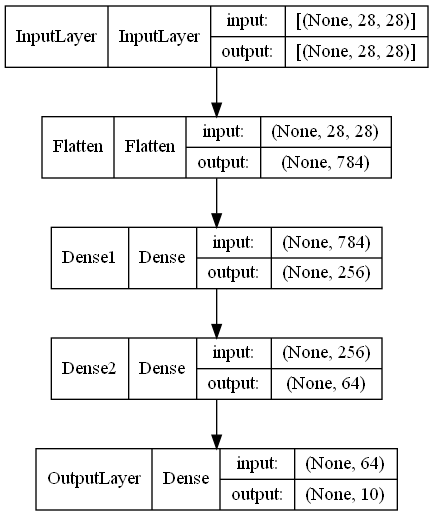

In [8]:
"""
tf.keras.Model()에 inputs 매개변수로 입력층인 input_layer를 지정하고 outputs 매개변수에 
출력층을 지정해주어 모델을 생성한다
모델 인스턴스 생성 시 name 매개변수에 이름을 지정하면
해당 이름이 summary()에 출력된다

복잡한 구조를 갖는 모델을 생성할 때 summary()로는 모델의 구조도를 시각화 하기 어렵다
케라스의 유틸 패키지에서 제공하는 plot_model 모듈을 활용하여 모델의 구조도를 시각화할 수있다
"""
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file="model.png")

In [9]:
"""
함수형 API로 생성한 모델 훈련

생성된 모델 인스턴스에 compile() 메소드로 모델을 컴파일하고 fit() 메소드로 모델을 훈련
훈련이 완료된 뒤 evaluate() 메소드로 검증
"""
#컴파일
func_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# 훈련 
func_model.fit(x_train, y_train, epochs=3)

#검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f"Functional Model- loss: {loss:5f}, acc:{acc:5f}")

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2143 - accuracy: 0.9360
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0872 - accuracy: 0.9723
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0609 - accuracy: 0.9806
Functional Model- loss: 0.072406, acc:0.977600


In [10]:
"""
###모델 서브클래싱
텐서플로우 케라스는 Model 클래스를 제공하고, 이를 기반으로 딥러닝 모델을 구현하고 있다
이 클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델을 만들 수도 있다

하지만 객체지향이나 파이썬 클래스의 개념이 부족하다면 굳이 Model Subclassing으로 모델을
구현하지 않아도 좋다 
함수형 API로 생성한 모델과의 성능 차이는 없다
따라서 이책의 예체를 실습할 때는 앞서 다룬 Sequentail API와 Functional API로 충분하다
"""

'\n###모델 서브클래싱\n텐서플로우 케라스는 Model 클래스를 제공하고, 이를 기반으로 딥러닝 모델을 구현하고 있다\n이 클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델을 만들 수도 있다\n\n하지만 객체지향이나 파이썬 클래스의 개념이 부족하다면 굳이 Model Subclassing으로 모델을\n구현하지 않아도 좋다 \n함수형 API로 생성한 모델과의 성능 차이는 없다\n따라서 이책의 예체를 실습할 때는 앞서 다룬 Sequentail API와 Functional API로 충분하다\n'

In [12]:
"""
Model Subvlassing 으로 모델 인스턴스를 생성하기 위해서는 tf.keras.Model를 상속받아 
생성하고자 하는 모델 클래스를 구현한다.
모델의 __init__()함수에 레이어를 정의하고 레이어의 하이퍼파라미터를 정의한다
"""
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        #초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation="relu")
        self.dense2 = tf.keras.layers.Dense(64, activation="relu")
        self.dense3 = tf.keras.layers.Dense(10, activation="softmax")
        
    #method overiding
    #훈련용 함수 정의
    # x 는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x
    
"""
call()함수를 메소드 오버라이딩으로 구현한다. call() 메소드는 fit()메소드가 호출되어 
훈련하는 경우 호출될 함수이다. call() 함수 내부에서는 모델의 입력부터 출력까지의 흐름,
즉 순전파(forward propagation)를 정의하고 함수형 API와 같은 방식으로 모든 레이어를 
체인처럼 연결한다 
마지막 출력값을 reuturn 한다
"""

In [13]:
"""
tf.keras.Model을 상속받아 구현한 모델인 MyModel을 생성자로 인스턴스를 생성한다
모델에 이름을 부여하고 싶다면 모델 인스턴스의 _name에 이름을 지정한다. 생성자로 
객체를 생성해 저장한 mymodel 변수에 바로 summary()로 요약 출력하는 것은 불가능하다.
input_shape이 정의되지 않았기 때문에 전체 모델의 구조를 생성해내지 못하기 때문
mymodel에 Input 레이어와 함께 shape을 정의해주면 summary()로 모델의 요약을 확인할 수 있다
"""

# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = "subclass_model"

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape = (28, 28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dense_4 (Dense)             multiple                  200960    
                                                                 
 dense_5 (Dense)             multiple                  16448     
                                                                 
 dense_6 (Dense)             multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [14]:
"""
Model Subclassing으로 생성된 모델의 훈련도 동일하게 compile()메소드로 컴파일 후 fit()
메소드로 훈련한다. 요약하면 함수형 API로 생성한 모델과 Model Subclassing으로 생성한 
모델 모두 동일한 compile() 메소드와 fit() 메소드로 훈련할 수 있다 
물론 evaluate() 메소드로 모델 성능을 검증할 수도 있다
단지 모델을 생성하는 방식에 차이가 있을 뿐이다
"""
# 컴파일
mymodel.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
               metrics=["accuracy"])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

#검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f"Subclassing Model- loss: {loss:5f}, acc:{acc:5f}")

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2127 - accuracy: 0.9370
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0854 - accuracy: 0.9734
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0604 - accuracy: 0.9807
Subclassing Model- loss: 0.082763, acc:0.976000


In [16]:
"""
서브클래싱 모델 파라미터를 활용한 생성

Model Subclassing으로 생성하는 장점은 생성자 파라미터로 모델 내부 레이어의 하이퍼파라미터를 
지정할 수 있다는 점이다
다음은 모델의 생성자 파라미터를 추가하여 동적으로 레이어의 유닛 개수를 초기화하는 예제
"""
class MyModel(tf.keras.Model):
    def __init__(self, units, num_classes):   # 생성자 파라미터 추가함
        super(MyModel, self).__init__()
        #초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units, activation="relu")
        self.dense2 = tf.keras.layers.Dense(units/4, activation="relu")
        self.dense3 = tf.keras.layers.Dense(num_classes, activation="softmax")
        
    #method overiding
    #훈련용 함수 정의
    # x 는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [17]:
"""
모델의 생성자 파라미터로 기준이 되는 unit의 개수를 입력받아 Dense 레이어의 유닛 개수를 
계산하여 설저한다
"""
# 모델 생성
mymodel = MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

#모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_7 (Dense)             multiple                  200960    
                                                                 
 dense_8 (Dense)             multiple                  16448     
                                                                 
 dense_9 (Dense)             multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [18]:
"""
모델 생성자에 생성자 파라미터로 초기화하여 생성한 모델에 summary()로 요약한 결과를 
확인해보면 동적으로 설정한 레이어의 파라미터가 초기화되었음을 알 수 있다.
"""
# 컴파일
mymodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])

# 훈련 
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f"Subclassing Model w. parameters- loss: {loss:5f}, acc:{acc:5f}")

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2098 - accuracy: 0.9381
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0885 - accuracy: 0.9727
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0612 - accuracy: 0.9805
Subclassing Model w. parameters- loss: 0.074578, acc:0.976200
